In [1]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
# Membaca dataset CSV
try:
    df = pd.read_csv("ETH-USD.csv")
except FileNotFoundError:
    print("File CSV tidak ditemukan. Pastikan file 'ETH-USD.csv' ada di direktori yang benar.")

In [3]:
# Mengubah kolom 'Date' menjadi tipe data datetime dan mengatur sebagai indeks
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Menetapkan frekuensi indeks menjadi harian
df = df.asfreq('D')

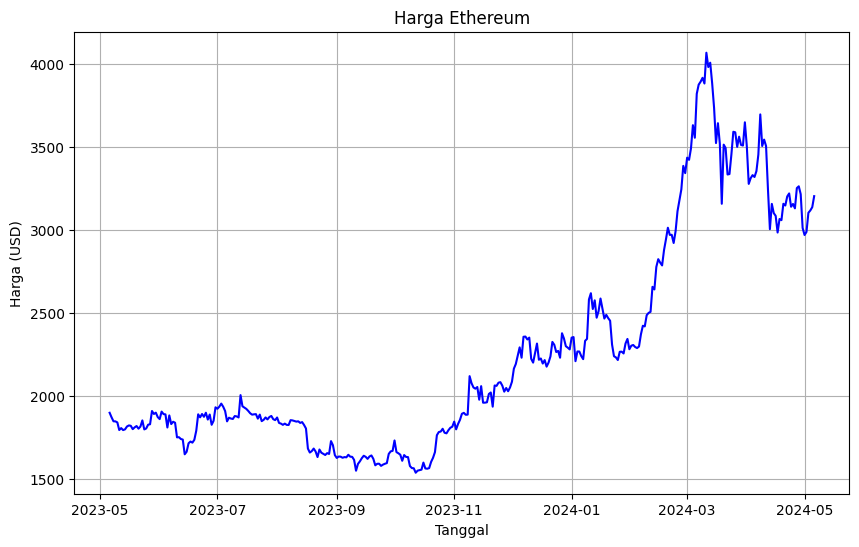

In [4]:
# Menampilkan plot harga Ethereum
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], color='blue')
plt.title('Harga Ethereum')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.grid(True)
plt.show()

In [5]:
# Mengecek stasionaritas dengan uji ADF
result = adfuller(df['Close'].dropna())
print('P-Value dari uji ADF:', result[1])
if result[1] > 0.05:
    print('Data tidak stasioner. Melakukan differencing...')
    df['Close_diff'] = df['Close'].diff().dropna()
else:
    print('Data sudah stasioner.')

P-Value dari uji ADF: 0.8424899830410362
Data tidak stasioner. Melakukan differencing...


In [6]:
# Memodelkan ARIMA dengan parameter yang diperbarui
model = ARIMA(df['Close'].dropna(), order=(5,1,0))  # Parameter (p, d, q) dapat disesuaikan
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  367
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2069.332
Date:                Mon, 22 Jul 2024   AIC                           4150.664
Time:                        22:25:01   BIC                           4174.080
Sample:                    05-06-2023   HQIC                          4159.969
                         - 05-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0785      0.033     -2.355      0.018      -0.144      -0.013
ar.L2         -0.0481      0.044     -1.095      0.274      -0.134       0.038
ar.L3          0.1198      0.042      2.849      0.0

In [7]:
# Prediksi harga Ethereum
start_date = pd.to_datetime('2024-01-07')
end_date = pd.to_datetime('2024-05-01')

# Menetapkan frekuensi prediksi menjadi harian
predictions = model_fit.predict(start=start_date, end=end_date, dynamic=False).asfreq('D')

In [8]:
# Memotong dataframe sesuai dengan rentang prediksi
actual_values = df.loc[start_date:end_date, 'Close']
predicted_values = predictions

# Menghitung MAE, MSE, dan RMSE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 75.79008605777224
Mean Squared Error (MSE): 11016.823245506406
Root Mean Squared Error (RMSE): 104.96105585171296


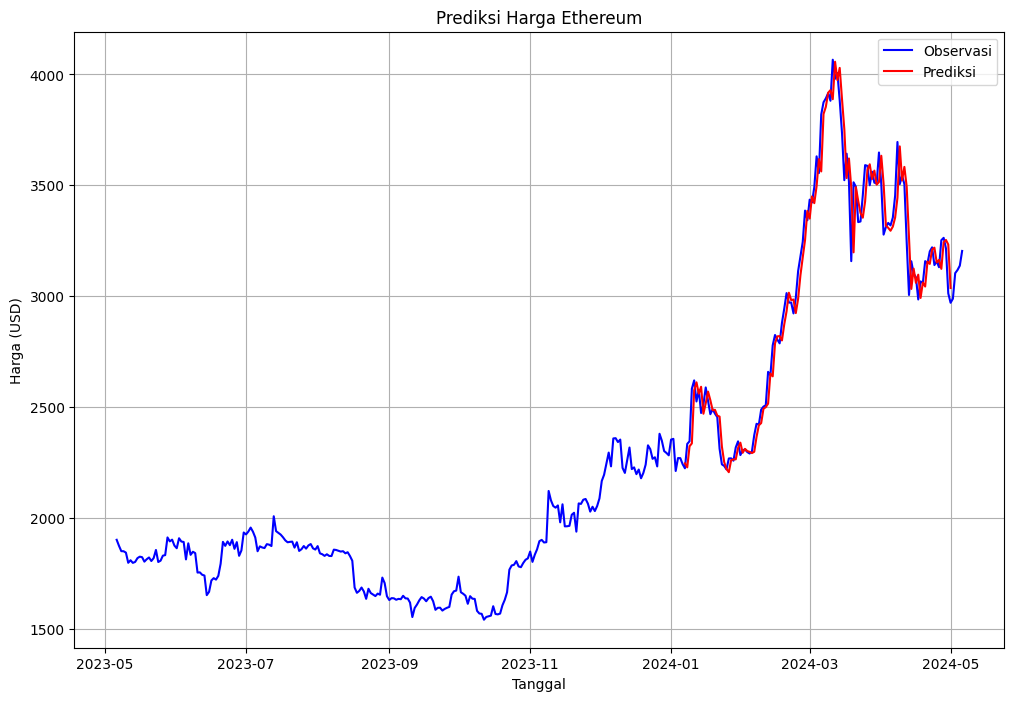

In [9]:
# Plot hasil prediksi
plt.figure(figsize=(12,8))
plt.plot(df.index, df['Close'], color='blue', label='Observasi')
plt.plot(predictions.index, predictions, color='red', label='Prediksi')

plt.title('Prediksi Harga Ethereum')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend()
plt.grid(True)
plt.show()